# Data Cleaning

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Datas: 
https://ec.europa.eu/eurostat/web/microdata/statistics-on-income-and-living-conditions

##### Documentation:
https://circabc.europa.eu/faces/jsp/extension/wai/navigation/container.jsp?FormPrincipal:_idcl=FormPrincipal:_id1&FormPrincipal_SUBMIT=1&id=c31bb5ae-2de6-49d3-bdcb-21992b3a2935&javax.faces.ViewState=meuDdJMlFsG5yNkNcejyPL481TffTqBlmAoXxLv4eKPClWnkj%2FIBx85kqWpflSLguyT5ndOI7k0APPg0%2F305IGJeFLWQfTP7dBwL1Bo1Kxt7G7Quw5NsD8LJJe9kdthN%2B%2BdW8EdW%2BAC%2FqwKdG11ap%2Fd0I6k%3D

## 1 Import Data

In [202]:
ppp = pd.read_csv("./data/DE_2013p_EUSILC.csv")

In [203]:
ppp.isna().sum()

PB010          0
PB020          0
PB030          0
PB040          0
PB040_F    22042
           ...  
PX020      22042
PX030      22042
PX040      22042
PX050      22042
PX200      22042
Length: 284, dtype: int64

In [204]:
ppp.head()

,PB010,PB020,PB030,PB040,PB040_F,PB060,PB060_F,PB100,PB100_F,PB110,...,PW210,PW210_F,PW220,PW220_F,PX010,PX020,PX030,PX040,PX050,PX200
0,2013,DE,35601,3057.583187,NaN,NaN,NaN,2,NaN,2013,...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013,DE,44701,3057.583187,NaN,NaN,NaN,3,NaN,2013,...,6.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,DE,59901,3057.583187,NaN,NaN,NaN,2,NaN,2013,...,6.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013,DE,71101,3057.583187,NaN,NaN,NaN,2,NaN,2013,...,5.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,DE,79501,3057.583187,NaN,NaN,NaN,2,NaN,2013,...,10.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:
## Drop columns with more than 20% nans
ppp.dropna(thresh=len(ppp)*0.8, axis=1, inplace = True)
ppp.shape

(22042, 64)

In [206]:
ppp.isna().sum().max()

3636

In [207]:
ppp.columns

Index(['PB010', 'PB020', 'PB030', 'PB040', 'PB100', 'PB110', 'PB120', 'PB140',
       'PB150', 'PB190', 'PB200', 'PB220A', 'PE010', 'PE040', 'PL031', 'PL035',
       'PL040', 'PL051', 'PL140', 'PL150', 'PL190', 'PH010', 'PH020', 'PH030',
       'PH040', 'PH060', 'PY010G', 'PY020G', 'PY021G', 'PY035G', 'PY050G',
       'PY080G', 'PY090G', 'PY100G', 'PY110G', 'PY120G', 'PY130G', 'PY140G',
       'PD020', 'PD030', 'PD050', 'PD060', 'PD070', 'PD080', 'PW010', 'PW020',
       'PW030', 'PW040', 'PW050', 'PW060', 'PW070', 'PW080', 'PW090', 'PW120',
       'PW130', 'PW140', 'PW150', 'PW160', 'PW170', 'PW180', 'PW190', 'PW200',
       'PW210', 'PW220'],
      dtype='object')

In [208]:
columnnames = {
"PB010": "PB010: YEAR OF THE SURVEY", 
"PB020": "PB020: COUNTRY",
"PB030": "PB030: PERSONAL ID",
"PB040": "PB040: PERSONAL CROSS-SECTIONAL WEIGHT",
"PB050": "PB050: PERSONAL BASE WEIGHT",
"PB060": "PB060: PERSONAL CROSS-SECTIONAL WEIGHT FOR SELECTED RESPONDENT",
"PB070": "PB070: PERSONAL DESIGN WEIGHT FOR SELECTED RESPONDENT",
"PB080": "PB080: PERSONAL BASE WEIGHT FOR SELECTED RESPONDENT",
"PB090": "PB090: DAY OF THE PERSONAL INTERVIEW", 
"PB100": "PB100: MONTH OF THE PERSONAL INTERVIEW", 
"PB110": "PB110: YEAR OF THE PERSONAL INTERVIEW",
"PB120": "PB120: MINUTES TO COMPLETE THE PERSONAL QUESTIONNAIRE",
"PB130": "PB130: MONTH OF BIRTH",
"PB140": "PB140: YEAR OF BIRTH",
"PB150": "PB150: SEX",
"PB160": "PB160: FATHER ID",
"PB170": "PB170: MOTHER",
"PB180": "PB180: SPOUSE/PARTNER ID",
"PB190": "PB190: MARITAL STATUS",
"PB200": "PB200: CONSENSUAL UNION",
"PB210": "PB210: COUNTRY OF BIRTH",
"PB220A": "PB220A: CITIZENSHIP",
"PB220B": "PB220B: CITIZENSHIP",
"PE010": "PE010: CURRENT EDUCATION ACTIVITY",
"PE020": "PE020: ISCED LEVEL CURRENTLY ATTENDED",
"PE030": "PE030: YEAR WHEN HIGHEST LEVEL OF EDUCATION WAS ATTAINED",
"PE040": "PE040: HIGHEST ISCED LEVEL ATTAINED",
"PH010": "PH010: GENERAL HEALTH",
"PH020": "PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION",
"PH030": "PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS",
"PH040": "PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT", 
"PH050": "PH050: MAIN REASON FOR UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT",
"PH060": "PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT",
"PH070": "PH070: MAIN REASON FOR UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT",
"PL015": "PL015: PERSON HAS EVER WORKED",
"PL020": "PL020: ACTIVELY LOOKING FOR A JOB",
"PL025": "PL025: AVAILABLE FOR WORK",
"PL031": "PL031: SELF-DEFINED CURRENT ECONOMIC STATUS",
"PL035": "PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK",
"PL040": "PL040: STATUS IN EMPLOYMENT",
"PL051": "PL051: OCCUPATION (ISCO-08 (COM))",
"PL060": "PL060: NUMBER OF HOURS USUALLY WORKED PER WEEK IN MAIN JOB",
"PL073": "PL073: NUMBER OF MONTHS SPENT AT FULL-TIME WORK AS EMPLOYEE",
"PL074": "PL074: NUMBER OF MONTHS SPENT AT PART-TIME WORK AS EMPLOYEE",
"PL075": "PL075: NUMBER OF MONTHS SPENT AT FULL-TIME WORK AS SELF-EMPLOYED (INCLUDING FAMILY WORKER)",
"PL076": "PL076: NUMBER OF MONTHS SPENT AT PART-TIME WORK AS SELF-EMPLOYED (INCLUDING FAMILY WORKER)",
"PL080": "PL080: NUMBER OF MONTHS SPENT IN UNEMPLOYMENT",
"PL085": "PL085: NUMBER OF MONTHS SPENT IN RETIREMENT OR EARLY RETIREMENT",
"PL086": "PL086: NUMBER OF MONTHS SPENT AS DISABLED OR/AND UNFIT TO WORK",
"PL087": "PL087: NUMBER OF MONTHS SPENT STUDYING",
"PL088": "PL088: NUMBER OF MONTHS SPENT IN COMPULSORY MILITARY SERVICE",
"PL089": "PL089: NUMBER OF MONTHS SPENT FULFILLING DOMESTIC TASKS AND CARE RESPONSIBILITIES",
"PL090": "PL090: NUMBER OF MONTHS SPENT IN OTHER INACTIVITY",
"PL100": "PL100: TOTAL NUMBER OF HOURS USUALLY WORKED IN SECOND, THIRD… JOBS",
"PL101": "PL111: NACE REV",
"PL120": "PL120: REASON FOR WORKING LESS THAN 30 HOURS",
"PL130": "PL130: NUMBER OF PERSONS WORKING AT THE LOCAL UNIT",
"PL140": "PL140: TYPE OF CONTRACT",
"PL150": "PL150: MANAGERIAL POSITION", 
"PL160": "PL160: CHANGE OF JOB SINCE LAST YEAR", 
"PL170": "PL170: REASON FOR CHANGE",
"PL180": "PL180: MOST RECENT CHANGE IN THE INDIVIDUAL’S ACTIVITY STATUS",
"PL190": "PL190: WHEN BEGAN FIRST REGULAR JOB",
"PL200": "PL200: NUMBER OF YEARS SPENT IN PAID WORK", 
"PY010G": "PY010G: EMPLOYEE CASH OR NEAR CASH INCOME",
"PY020G": "PY020G: NON-CASH EMPLOYEE INCOME",
"PY021G": "PY021G: COMPANY CAR",
"PY030G": "PY030G: EMPLOYER'S SOCIAL INSURANCE CONTRIBUTION",
"PY031G": "PY031G: OPTIONAL EMPLOYER'S SOCIAL INSURANCE CONTRIBUTIONS",
"PY035G": "PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS", 
"PY050G": "PY050G: CASH BENEFITS OR LOSSES FROM SELF-EMPLOYMENT",
"PY080G": "PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS",
"PY090G": "PY090G: UNEMPLOYMENT BENEFITS", 
"PY100G": "PY100G: OLD-AGE BENEFITS", 
"PY110G": "PY110G: SURVIVOR’ BENEFITS", 
"PY120G": "PY120G: SICKNESS BENEFITS", 
"PY130G": "PY130G: DISABILITY BENEFITS",
"PY140G": "PY140G: EDUCATION-RELATED ALLOWANCES", 
"PY200G": "PY200G: GROSS MONTHLY EARNINGS FOR EMPLOYEES", 
"PW010": "PW010: OVERALL LIFE SATISFACTION", 
"PW020": "PW020: MEANING OF LIFE", 
"PW030": "PW030: SATISFACTION WITH FINANCIAL SITUATION", 
"PW040": "PW040: SATISFACTION WITH ACCOMMODATION",
"PW050": "PW050: BEING VERY NERVOUS", 
"PW060": "PW060: FEELING DOWN IN THE DUMPS",
"PW070": "PW070: FEELING CALM AND PEACEFUL", 
"PW080": "PW080: FEELING DOWNHEARTED OR DEPRESSED",
"PW090": "PW090: BEING HAPPY",
"PW100": "PW100: JOB SATISFACTION",
"PW110": "PW110: SATISFACTION WITH COMMUTING TIME",
"PW120": "PW120: SATISFACTION WITH TIME USE",
"PW130": "PW130: TRUST IN THE POLITICAL SYSTEM",
"PW140": "PW140: TRUST IN THE LEGAL SYSTEM",
"PW150": "PW150: TRUST IN THE POLICE",
"PW160": "PW160: SATISFACTION WITH PERSONAL RELATIONSHIPS",
"PW170": "PW170: PERSONAL MATTERS (ANYONE TO DISCUSS WITH)", 
"PW180": "PW180: HELP FROM OTHERS",
"PW190": "PW190: TRUST IN OTHERS",
"PW200": "PW200: SATISFACTION WITH RECREATIONAL OR GREEN AREAS",
"PW210": "PW210: SATISFACTION WITH LIVING ENVIRONMENT", 
"PW220": "PW220: PHYSICAL SECURITY",
'PD020': "PD020: Replace worn-out clothes by some new (not second-hand) ones" , 
'PD030': "PD030: Two pairs of properly fitting shoes", 
'PD050': "PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month", 
'PD060': "PD060: Regularly participate in a leisure activity", 
'PD070': "PD070: Spend a small amount of money each week on yourself",
'PD080': "PD080: Internet connection for personal use at home"
}

###PD:  ADDITIONAL VARIABLES FOR MATERIAL DEPRIVATION

In [209]:
def reload():
    ppp = ppp = pd.read_csv("./data/DE_2013p_EUSILC.csv")
    ppp=ppp.dropna(thresh=len(ppp)*0.8, axis=1)
    ppp = ppp.rename(columns=columnnames)
    return ppp

In [210]:
ppp = ppp.rename(columns=columnnames)
ppp.columns

Index(['PB010: YEAR OF THE SURVEY', 'PB020: COUNTRY', 'PB030: PERSONAL ID',
       'PB040: PERSONAL CROSS-SECTIONAL WEIGHT',
       'PB100: MONTH OF THE PERSONAL INTERVIEW',
       'PB110: YEAR OF THE PERSONAL INTERVIEW',
       'PB120: MINUTES TO COMPLETE THE PERSONAL QUESTIONNAIRE',
       'PB140: YEAR OF BIRTH', 'PB150: SEX', 'PB190: MARITAL STATUS',
       'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP',
       'PE010: CURRENT EDUCATION ACTIVITY',
       'PE040: HIGHEST ISCED LEVEL ATTAINED',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
       'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
       'PL040: STATUS IN EMPLOYMENT', 'PL051: OCCUPATION (ISCO-08 (COM))',
       'PL140: TYPE OF CONTRACT', 'PL150: MANAGERIAL POSITION',
       'PL190: WHEN BEGAN FIRST REGULAR JOB', 'PH010: GENERAL HEALTH',
       'PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION',
       'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
       'PH040: UNME

In [211]:
### drop columns because not of interest
print(ppp.shape)
columnstodrop=['PB020: COUNTRY', 'PB010: YEAR OF THE SURVEY', 'PB030: PERSONAL ID','PB040: PERSONAL CROSS-SECTIONAL WEIGHT', 'PB100: MONTH OF THE PERSONAL INTERVIEW',
               'PB110: YEAR OF THE PERSONAL INTERVIEW','PB120: MINUTES TO COMPLETE THE PERSONAL QUESTIONNAIRE']

ppp.drop(columnstodrop, axis=1, inplace=True)

(22042, 64)


In [212]:
ppp.shape

(22042, 57)

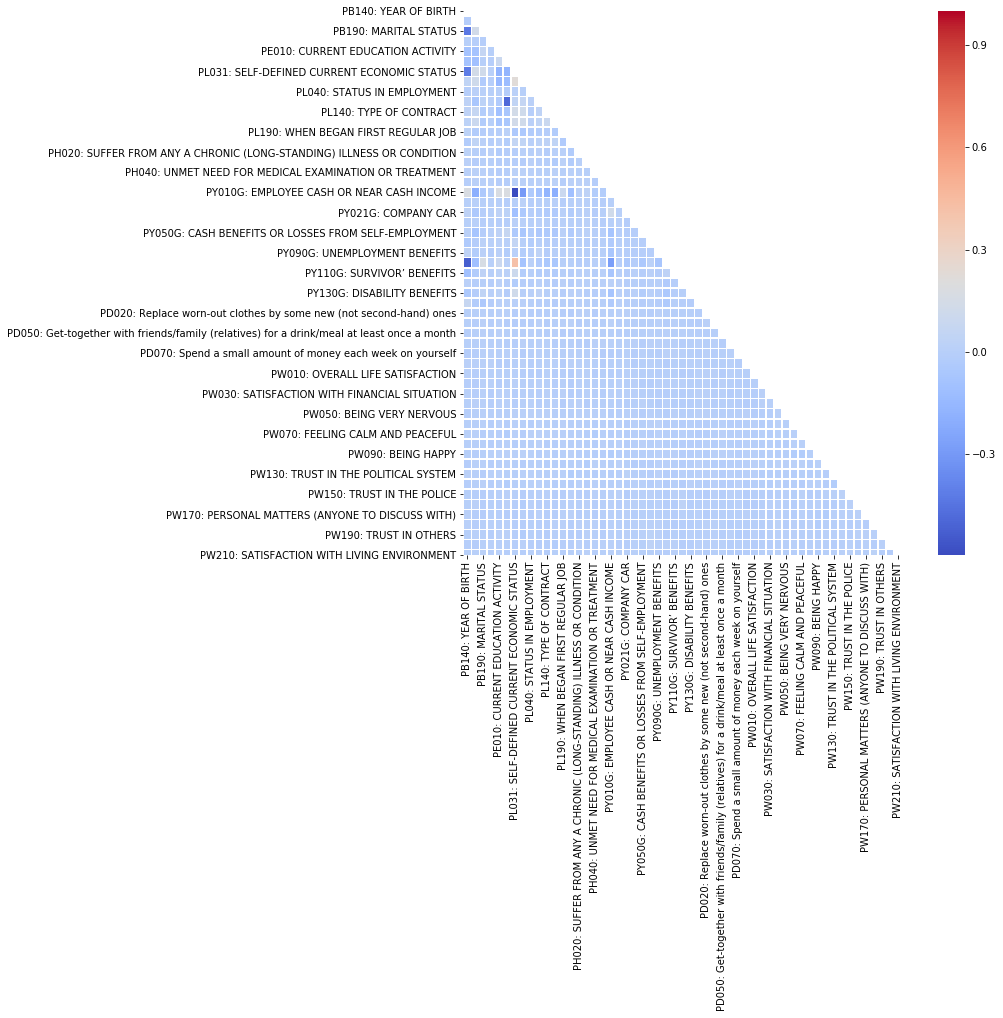

In [213]:
## Check Correlation
plt.figure(figsize =(10,10))
corr = ppp.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, cmap='coolwarm', annot = False, linewidth=0.5, mask=mask)

In [214]:
#subsets
background = ['PB140: YEAR OF BIRTH','PB150: SEX',
              'PB190: MARITAL STATUS','PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP']


education = ['PE010: CURRENT EDUCATION ACTIVITY', 'PE040: HIGHEST ISCED LEVEL ATTAINED']

work = ['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
       'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
       'PL040: STATUS IN EMPLOYMENT', 'PL051: OCCUPATION (ISCO-08 (COM))',
       'PL140: TYPE OF CONTRACT', 'PL150: MANAGERIAL POSITION',
       'PL190: WHEN BEGAN FIRST REGULAR JOB']


health = ['PH010: GENERAL HEALTH',
 'PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION',
 'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
 'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
 'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT']


job=['PY010G: EMPLOYEE CASH OR NEAR CASH INCOME',
       'PY020G: NON-CASH EMPLOYEE INCOME', 'PY021G: COMPANY CAR',
       'PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS',
       'PY050G: CASH BENEFITS OR LOSSES FROM SELF-EMPLOYMENT',
       'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
       'PY090G: UNEMPLOYMENT BENEFITS', 'PY100G: OLD-AGE BENEFITS',
       'PY110G: SURVIVOR’ BENEFITS', 'PY120G: SICKNESS BENEFITS',
       'PY130G: DISABILITY BENEFITS', 'PY140G: EDUCATION-RELATED ALLOWANCES']

       

bneeds= ['PD020: Replace worn-out clothes by some new (not second-hand) ones',
       'PD030: Two pairs of properly fitting shoes',
       'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
       'PD060: Regularly participate in a leisure activity',
       'PD070: Spend a small amount of money each week on yourself',
       'PD080: Internet connection for personal use at home']


sat =['PW010: OVERALL LIFE SATISFACTION', 'PW020: MEANING OF LIFE',
       'PW030: SATISFACTION WITH FINANCIAL SITUATION',
       'PW040: SATISFACTION WITH ACCOMMODATION', 'PW050: BEING VERY NERVOUS',
       'PW060: FEELING DOWN IN THE DUMPS', 'PW070: FEELING CALM AND PEACEFUL',
       'PW080: FEELING DOWNHEARTED OR DEPRESSED', 'PW090: BEING HAPPY',
       'PW120: SATISFACTION WITH TIME USE',
       'PW130: TRUST IN THE POLITICAL SYSTEM',
       'PW140: TRUST IN THE LEGAL SYSTEM', 'PW150: TRUST IN THE POLICE',
       'PW160: SATISFACTION WITH PERSONAL RELATIONSHIPS',
       'PW170: PERSONAL MATTERS (ANYONE TO DISCUSS WITH)',
       'PW180: HELP FROM OTHERS', 'PW190: TRUST IN OTHERS',
       'PW200: SATISFACTION WITH RECREATIONAL OR GREEN AREAS',
       'PW210: SATISFACTION WITH LIVING ENVIRONMENT',
       'PW220: PHYSICAL SECURITY']


y=['PW010: OVERALL LIFE SATISFACTION']


subsets= [background,education,work,health,job,bneeds, sat]
columns = []
for x in subsets:
    for y in x:
        columns.append (y)
columns



['PB140: YEAR OF BIRTH',
 'PB150: SEX',
 'PB190: MARITAL STATUS',
 'PB200: CONSENSUAL UNION',
 'PB220A: CITIZENSHIP',
 'PE010: CURRENT EDUCATION ACTIVITY',
 'PE040: HIGHEST ISCED LEVEL ATTAINED',
 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
 'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
 'PL040: STATUS IN EMPLOYMENT',
 'PL051: OCCUPATION (ISCO-08 (COM))',
 'PL140: TYPE OF CONTRACT',
 'PL150: MANAGERIAL POSITION',
 'PL190: WHEN BEGAN FIRST REGULAR JOB',
 'PH010: GENERAL HEALTH',
 'PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION',
 'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
 'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
 'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
 'PY010G: EMPLOYEE CASH OR NEAR CASH INCOME',
 'PY020G: NON-CASH EMPLOYEE INCOME',
 'PY021G: COMPANY CAR',
 'PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS',
 'PY050G: CASH BENEFITS OR LOSSES FROM SELF-EMPLOYMENT',
 'PY080G: PENSION FROM

## Check Correlation

In [215]:
ppp.corr().apply(lambda x: round(x,2))['PW010: OVERALL LIFE SATISFACTION'].nsmallest(5)

PB150: SEX                                               -0.01
PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK   -0.01
PL051: OCCUPATION (ISCO-08 (COM))                        -0.01
PL150: MANAGERIAL POSITION                               -0.01
PH010: GENERAL HEALTH                                    -0.01
Name: PW010: OVERALL LIFE SATISFACTION, dtype: float64

In [216]:
ppp.corr().apply(lambda x: round(x,2))['PW010: OVERALL LIFE SATISFACTION'].nlargest(5)

PW010: OVERALL LIFE SATISFACTION                                         1.00
PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION    0.01
PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS               0.01
PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS                0.01
PY140G: EDUCATION-RELATED ALLOWANCES                                     0.01
Name: PW010: OVERALL LIFE SATISFACTION, dtype: float64

In [217]:
ppp.shape

(22042, 57)

# 2. Check column per column

## 2.1 Background (PB) - Columns

In [218]:
background

['PB140: YEAR OF BIRTH',
 'PB150: SEX',
 'PB190: MARITAL STATUS',
 'PB200: CONSENSUAL UNION',
 'PB220A: CITIZENSHIP']

###### [0] ["PB140: YEAR OF BIRTH"]

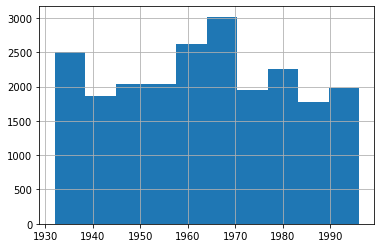

In [219]:
ppp[background[0]].dtype

ppp[background[0]].describe()
ppp[background[0]].hist()


## ok

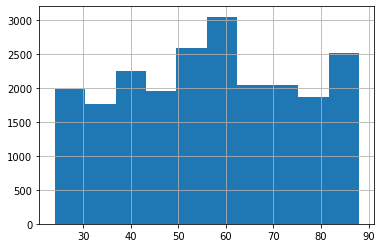

In [220]:
## change to age
ppp[background[0]]=ppp[background[0]].apply(lambda x: 2020-x)
ppp[background[0]].hist()

###### [1] ['PB150: SEX']

In [221]:
background[1]

'PB150: SEX'

In [222]:
ppp['PB150: SEX'].unique

"""
1 Male 
2 Female 
"""

'\n1 Male \n2 Female \n'

In [223]:
ppp['PB150: SEX'].value_counts(normalize=True)

## more or less balanced, no missing values

## standardize to international coding: 0 for female and 1 for male
ppp['PB150: SEX'] = ppp['PB150: SEX'].apply(lambda x: 0 if x==2 else 1)

###### [2] ['PB190: MARITAL STATUS']

In [224]:
"""
1 Never married 
2 Married 
3 Separated 
4 Widowed 
5 Divorced 

"""
ppp[background[2]].unique()

array([ 2.,  5.,  4.,  1.,  3., nan])

In [225]:
ppp['PB190: MARITAL STATUS'].value_counts()

ppp['PB190: MARITAL STATUS'].isna().sum()

159

In [226]:
# drop rows?

ppp[ppp['PB190: MARITAL STATUS'].isna()].isna().sum()/ ppp.isna().sum()

PB140: YEAR OF BIRTH                                                                               NaN
PB150: SEX                                                                                         NaN
PB190: MARITAL STATUS                                                                         1.000000
PB200: CONSENSUAL UNION                                                                            NaN
PB220A: CITIZENSHIP                                                                           0.981481
PE010: CURRENT EDUCATION ACTIVITY                                                                  NaN
PE040: HIGHEST ISCED LEVEL ATTAINED                                                           0.907514
PL031: SELF-DEFINED CURRENT ECONOMIC STATUS                                                   1.000000
PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK                                             NaN
PL040: STATUS IN EMPLOYMENT                                              

In [227]:
## because the one missing martial status have also other nans, i ll drop 
ppp.dropna(subset =['PB190: MARITAL STATUS'], inplace=True)

In [228]:
ppp['PB190: MARITAL STATUS'].isna().sum()

0

###### [3] [PB200: CONSENSUAL UNION']

In [229]:
"""
Consensual union refers to the situation when two persons belong to the same household, and have a ‘marriage-like’ relationship with each other, and are not married to or in a registered partnership with each other.

1 yes, on a legal basis
2 yes, without a legal basis
3 no 
"""
ppp['PB200: CONSENSUAL UNION'].unique()

array([3, 1, 2], dtype=int64)

In [230]:
### difference to martital status
pd.crosstab(ppp['PB190: MARITAL STATUS'], ppp['PB200: CONSENSUAL UNION'],margins = True, normalize='index').apply(lambda x: round(x,2))
## independent... (because equal distributed) --> keep column

PB200: CONSENSUAL UNION,1,2,3
PB190: MARITAL STATUS,,,
1.0,0.52,0.07,0.40
2.0,0.52,0.07,0.41
3.0,0.54,0.08,0.38
4.0,0.54,0.06,0.40
5.0,0.53,0.07,0.40
All,0.52,0.07,0.41


In [231]:
ppp['PB200: CONSENSUAL UNION'].value_counts()
ppp['PB200: CONSENSUAL UNION'].isna().sum()

0

###### [4] ['PB220A: CITIZENSHIP']

In [232]:
"""
Citizenship is defined as the particular legal bond between the individual and his/her State 
acquired by birth or naturalisation, whether by declaration, choice, option, marriage or other 
means according to the national legislation. It generally corresponds to the country issuing the 
passport. 
LOC: Local?
OTH: other
"""

ppp['PB220A: CITIZENSHIP'].unique()

## change to 1[Loc] and 0[Other]

ppp['PB220A: CITIZENSHIP'] = ppp['PB220A: CITIZENSHIP'].apply(lambda x: 0 if x =='LOC' else 1)

In [233]:
print(ppp['PB220A: CITIZENSHIP'].isna().sum())

# drop rows? depends, if important information... a lot of other?
ppp['PB220A: CITIZENSHIP'].value_counts(normalize=True).apply(lambda x: round(x,2))

### two options. drop column or drop nan.... ## when i check later, after all the data cleaning, only 4 nans --> drop
pppsh=ppp.shape[0]
ppp=ppp.dropna(subset=['PB220A: CITIZENSHIP'])
pppsh-ppp.shape[0]

0


0

##### Conclusion Background

In [234]:
## keep all columns

In [235]:
ppp[background].isna().sum()

PB140: YEAR OF BIRTH       0
PB150: SEX                 0
PB190: MARITAL STATUS      0
PB200: CONSENSUAL UNION    0
PB220A: CITIZENSHIP        0
dtype: int64

In [236]:
cols=background
cols

['PB140: YEAR OF BIRTH',
 'PB150: SEX',
 'PB190: MARITAL STATUS',
 'PB200: CONSENSUAL UNION',
 'PB220A: CITIZENSHIP']

## 2.2 Education (PE) - Columns

In [237]:
ppp[education].isna().sum()

PE010: CURRENT EDUCATION ACTIVITY       0
PE040: HIGHEST ISCED LEVEL ATTAINED    16
dtype: int64

In [238]:
## 'PE010: CURRENT EDUCATION ACTIVITY'

"""
The concept is whether the person is currently participating in an educational program. 
1 in education 
2 not in education 
"""

ppp['PE010: CURRENT EDUCATION ACTIVITY'].value_counts()

## all good

2    19506
1     2377
Name: PE010: CURRENT EDUCATION ACTIVITY, dtype: int64

16


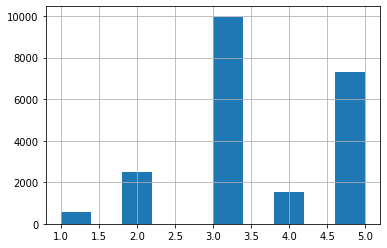

In [239]:
## 'PE040: HIGHEST ISCED LEVEL ATTAINED'

"""
Educational attainment of a person is the highest level of an educational programme the 
person has successfully completed and the study field of this programme0 pre-primary education.
1 primary education 
2 lower secondary education 
3 (upper) secondary education 
4 post-secondary non tertiary education 
5 first stage of tertiary education (not leading directly to an advanced research 
qualification) 
6 second stage of tertiary education (leading to an advanced research 
qualification)
"""

ppp['PE040: HIGHEST ISCED LEVEL ATTAINED'].value_counts()
print(ppp['PE040: HIGHEST ISCED LEVEL ATTAINED'].isna().sum())

###  only 16 missings (when deleted all the rows based on the following cleaning) --> drop na
ppp=ppp.dropna(subset=['PE040: HIGHEST ISCED LEVEL ATTAINED'])
ppp['PE040: HIGHEST ISCED LEVEL ATTAINED'].hist()

###### sum up

In [240]:
for x in  education:
    cols.append(x)
print(cols)

['PB140: YEAR OF BIRTH', 'PB150: SEX', 'PB190: MARITAL STATUS', 'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP', 'PE010: CURRENT EDUCATION ACTIVITY', 'PE040: HIGHEST ISCED LEVEL ATTAINED']


## 2.3 Labour (PL) - Columns

In [241]:
print(ppp[work].isna().sum())

PL031: SELF-DEFINED CURRENT ECONOMIC STATUS                  0
PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK       0
PL040: STATUS IN EMPLOYMENT                               1570
PL051: OCCUPATION (ISCO-08 (COM))                         1507
PL140: TYPE OF CONTRACT                                   2771
PL150: MANAGERIAL POSITION                                2724
PL190: WHEN BEGAN FIRST REGULAR JOB                       1947
dtype: int64


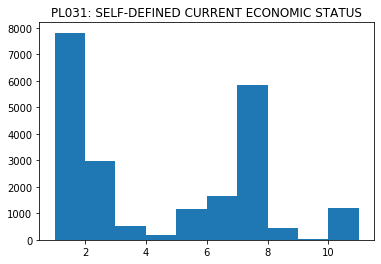

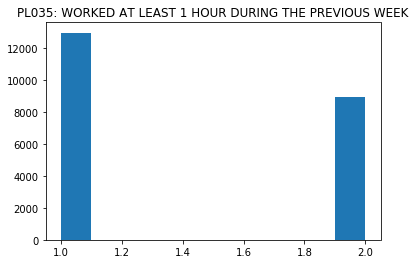

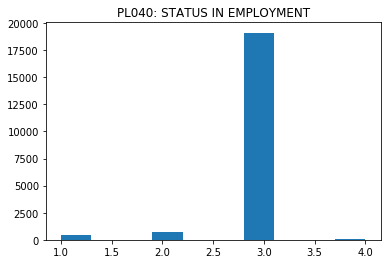

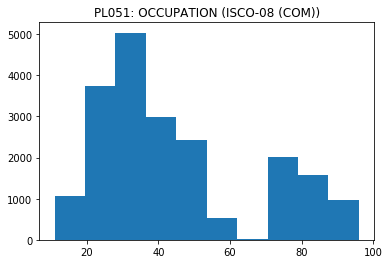

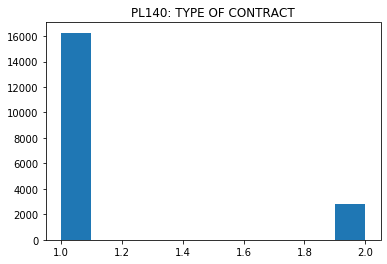

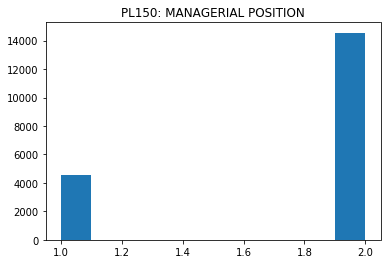

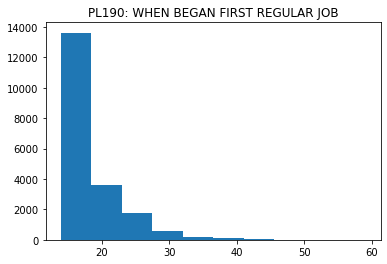

In [242]:
for x in range(len(work)):
    plt.hist(ppp[work[x]])
    plt.title(work[x])
    plt.show()


In [243]:
### check if nans are in the same row
for x in range(3,7): 
    null_displ = ppp[ppp[work[x]].isnull()==False]
    print(null_displ[work].isna().sum())

### not the same --> look for other solutions to fill na

PL031: SELF-DEFINED CURRENT ECONOMIC STATUS                  0
PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK       0
PL040: STATUS IN EMPLOYMENT                               1215
PL051: OCCUPATION (ISCO-08 (COM))                            0
PL140: TYPE OF CONTRACT                                   2323
PL150: MANAGERIAL POSITION                                2294
PL190: WHEN BEGAN FIRST REGULAR JOB                       1484
dtype: int64
PL031: SELF-DEFINED CURRENT ECONOMIC STATUS                  0
PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK       0
PL040: STATUS IN EMPLOYMENT                               1076
PL051: OCCUPATION (ISCO-08 (COM))                         1059
PL140: TYPE OF CONTRACT                                      0
PL150: MANAGERIAL POSITION                                2068
PL190: WHEN BEGAN FIRST REGULAR JOB                       1313
dtype: int64
PL031: SELF-DEFINED CURRENT ECONOMIC STATUS                  0
PL035: WORKED AT LEAST 1 HOUR

###### [0]  ['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']

In [244]:
"""
The target variable captures the person’s own perception of their main activity at present.  It 
differs from the ILO concept to the extent that people’s own perception of their main status 
differs from the strict definitions used in the ILO definitions.
1 Employee working full-time 
2 Employee working part-time 
3 Self-employed working full-time (including family worker) 
4 Self-employed working part-time (including family worker) 
5 Unemployed 
6 Pupil, student, further training, unpaid work experience 
7 In retirement or in early retirement or has given up business 
8 Permanently disabled or/and unfit to work 
9 In compulsory military community or service 
10 Fulfilling domestic tasks and care responsibilities 
11 Other inactive person 
"""
ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS'].unique()

## ok

array([ 1.,  7., 11.,  3.,  2.,  6., 10.,  8.,  5.,  4.,  9.])

###### [1] 'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK'

In [245]:
"""
A person is considered as working
reference week or if he/she was not working
absent during the reference week. 
1 yes
2 no
"""
ppp['PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK'].value_counts()

ppp['PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK'].isna().sum()

# all good

0

###### [2] 'PL040: STATUS IN EMPLOYMENT'

In [246]:
"""
This variable refers to the main job, namely the current main job for people at work.
1 self-employed with employees 
2 self-employed without employees 
3 employee 
4 family worker 

"""
ppp['PL040: STATUS IN EMPLOYMENT'].value_counts()

3.0    19111
2.0      734
1.0      419
4.0       33
Name: PL040: STATUS IN EMPLOYMENT, dtype: int64

In [247]:
### missing values as big problem
ppp['PL040: STATUS IN EMPLOYMENT'].isna().sum()

1570

In [248]:
## attention; similar information as ['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS'] --> colinearity / overfitting
pd.crosstab( ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS'],ppp['PL040: STATUS IN EMPLOYMENT'].isna())

PL040: STATUS IN EMPLOYMENT,False,True
PL031: SELF-DEFINED CURRENT ECONOMIC STATUS,,
1.0,7690,130
2.0,2810,183
3.0,516,11
4.0,167,20
5.0,972,189
6.0,1261,397
7.0,5553,299
8.0,428,30
9.0,14,0


In [249]:
## at the same time a lot of missings  --> unemployed or others? mainly in status 5 (unemployed) 6, 7 10, 11 other non-jobs
## we can fill nan with a 0 for this categories as "no status"

ppp.loc[(ppp['PL040: STATUS IN EMPLOYMENT'].isna()) & ((ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']==5) | (ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']==6) | (ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']==7) | (ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']==8) |(ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']==10) |(ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']==11)), 'PL040: STATUS IN EMPLOYMENT'] = 0
print(ppp['PL040: STATUS IN EMPLOYMENT'].isna().sum())
pd.crosstab( ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS'],ppp['PL040: STATUS IN EMPLOYMENT'].isna())

344


PL040: STATUS IN EMPLOYMENT,False,True
PL031: SELF-DEFINED CURRENT ECONOMIC STATUS,,
1.0,7690,130
2.0,2810,183
3.0,516,11
4.0,167,20
5.0,1161,0
6.0,1658,0
7.0,5852,0
8.0,458,0
9.0,14,0


In [250]:
## still a lot of nans
ppp[work].isna().sum()

null_displ = ppp[ppp["PL040: STATUS IN EMPLOYMENT"].isnull()==False]
null_displ[work].isna().sum()
### still a lot of nans in the other categories

PL031: SELF-DEFINED CURRENT ECONOMIC STATUS                  0
PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK       0
PL040: STATUS IN EMPLOYMENT                                  0
PL051: OCCUPATION (ISCO-08 (COM))                         1505
PL140: TYPE OF CONTRACT                                   2666
PL150: MANAGERIAL POSITION                                2640
PL190: WHEN BEGAN FIRST REGULAR JOB                       1858
dtype: int64

In [251]:
## because the information is similar to self-defined current economic status i'll drop the column
ppp.drop("PL040: STATUS IN EMPLOYMENT", axis=1, inplace = True)

In [252]:
work.remove("PL040: STATUS IN EMPLOYMENT")

###### [3] 'PL051: OCCUPATION (ISCO-08 (COM))'

In [253]:
"""
This variable reafers to the main job, namely the current main job for people at work (PL031 = 
1, 2, 3 or 4) or the last main job for people who do not have a job (PL031 not = 1, 2, 3 or 4 
and PL015 = 1). 
Numbers between 
"""
print(ppp['PL051: OCCUPATION (ISCO-08 (COM))'].unique())
## ok, 

[52. 62. 23. 51. 44. 31. 24. 32. 42. 81. 22. 41. 73. 93. 72. 33. 61. nan
 94. 96. 71. 43. 25. 91. 13. 92. 74. 21. 75. 34. 26. 83. 11. 12. 14. 54.
 35. 53. 82.]


In [254]:
## 1670 missings, same problems as with previous variables, unemployed or others? :
pd.crosstab( ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS'],ppp['PL051: OCCUPATION (ISCO-08 (COM))'].isna())
# mainly in status 5 (unemployed) 6, 9, 10, 11 other non-jobs

PL051: OCCUPATION (ISCO-08 (COM)),False,True
PL031: SELF-DEFINED CURRENT ECONOMIC STATUS,,
1.0,7813,7
2.0,2972,21
3.0,526,1
4.0,184,3
5.0,1022,139
6.0,658,1000
7.0,5736,116
8.0,420,38
9.0,0,14


In [255]:
## drop nans because its a very important feature probably
ppp.dropna(subset=['PL051: OCCUPATION (ISCO-08 (COM))'], inplace = True)

In [256]:
ppp[work].isna().sum()

PL031: SELF-DEFINED CURRENT ECONOMIC STATUS                  0
PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK       0
PL051: OCCUPATION (ISCO-08 (COM))                            0
PL140: TYPE OF CONTRACT                                   2323
PL150: MANAGERIAL POSITION                                2294
PL190: WHEN BEGAN FIRST REGULAR JOB                       1484
dtype: int64

[Details in structure08 here:](./data/structure08.docx)

###### [4] 'PL140: TYPE OF CONTRACT', 

In [257]:
"""
'PL140: TYPE OF CONTRACT'
1 permanent job/work contract of unlimited duration 
2 temporary job/work contract of limited duration
This question is addressed only to employees. 

Fillna with 0 : no contract
"""
print(ppp['PL140: TYPE OF CONTRACT'].unique())
## ok, 


## alot of missings, same problems as with previous variables, unemployed or others? :
pd.crosstab( ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS'],ppp['PL140: TYPE OF CONTRACT'].isna(),normalize='index').apply(lambda x: round(x,2))

[ 1. nan  2.]


PL140: TYPE OF CONTRACT,False,True
PL031: SELF-DEFINED CURRENT ECONOMIC STATUS,,
1.0,0.93,0.07
2.0,0.87,0.13
3.0,0.92,0.08
4.0,0.88,0.12
5.0,0.78,0.22
6.0,0.74,0.26
7.0,0.90,0.10
8.0,0.88,0.12
10.0,0.69,0.31


In [258]:
# mainly in status 5 (unemployed) 6, 9, 10, 11 other non-jobs
# fillna with 0 for pl31 5,6,etc.?
ppp.loc[(ppp['PL140: TYPE OF CONTRACT'].isna()) & ((ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']==5) | (ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']==6) | (ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']==7) | (ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']==8) |(ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']==9) |(ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']==10) |(ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']==11)), 'PL140: TYPE OF CONTRACT'] =0

pd.crosstab( ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS'],ppp['PL140: TYPE OF CONTRACT'].isna())

PL140: TYPE OF CONTRACT,False,True
PL031: SELF-DEFINED CURRENT ECONOMIC STATUS,,
1.0,7242,571
2.0,2600,372
3.0,484,42
4.0,162,22
5.0,1022,0
6.0,658,0
7.0,5736,0
8.0,420,0
10.0,826,0


In [259]:
ppp[work].isna().sum()
### still a lot of nans...(1000)

PL031: SELF-DEFINED CURRENT ECONOMIC STATUS                  0
PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK       0
PL051: OCCUPATION (ISCO-08 (COM))                            0
PL140: TYPE OF CONTRACT                                   1007
PL150: MANAGERIAL POSITION                                2294
PL190: WHEN BEGAN FIRST REGULAR JOB                       1484
dtype: int64

In [260]:
# because still a lot of nans i drop the column. it is not one of the most important 
## because the information is similar to self-defined current economic status i'll drop the column

work.remove("PL140: TYPE OF CONTRACT")

In [261]:
ppp.drop("PL140: TYPE OF CONTRACT", axis= 1, inplace=True)

###### [5] 'PL150: MANAGERIAL POSITION'

In [262]:
"""
'PL150: MANAGERIAL POSITION'
1 supervisory : includes formal responsibility for supervising a group of other employees
2 non-supervisory

referst to PL031=1, 2, 3 or 4
"""

print(ppp['PL150: MANAGERIAL POSITION'].unique())
## ok, 

## alot of missings, same problems as with previous variables, unemployed or others? :
pd.crosstab( ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS'],ppp['PL150: MANAGERIAL POSITION'].isna(),normalize='index').apply(lambda x: round(x,2))
# mainly in status 5 (unemployed) 6, 9, 10, 11 other non-jobs
# fillna with -1 for pl31 5,6,etc.?

[ 1.  2. nan]


PL150: MANAGERIAL POSITION,False,True
PL031: SELF-DEFINED CURRENT ECONOMIC STATUS,,
1.0,0.93,0.07
2.0,0.88,0.12
3.0,0.94,0.06
4.0,0.85,0.15
5.0,0.77,0.23
6.0,0.72,0.28
7.0,0.90,0.10
8.0,0.88,0.12
10.0,0.71,0.29


In [263]:
# we could fill na in status 5 (unemployed) 6, 9, 10, 11 other non-jobs
# but i dont like negative values it does not make sense --> drop column

In [264]:
work.remove('PL150: MANAGERIAL POSITION')

In [265]:
ppp.drop('PL150: MANAGERIAL POSITION', axis =1, inplace=True)

###### [6]  'PL190: WHEN BEGAN FIRST REGULAR JOB'

In [266]:
"""
'PL190: WHEN BEGAN FIRST REGULAR JOB'
It is designed to permit the calculation of the total potential time the person could have spent 
in the labour force. It is the age at which the person began their first regular job. 
"""

"\n'PL190: WHEN BEGAN FIRST REGULAR JOB'\nIt is designed to permit the calculation of the total potential time the person could have spent \nin the labour force. It is the age at which the person began their first regular job. \n"

(array([1.2902e+04, 3.3960e+03, 1.6610e+03, 5.5600e+02, 1.8400e+02,
        9.2000e+01, 5.3000e+01, 1.6000e+01, 1.2000e+01, 4.0000e+00]),
 array([14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. , 54.5, 59. ]),
 <a list of 10 Patch objects>)

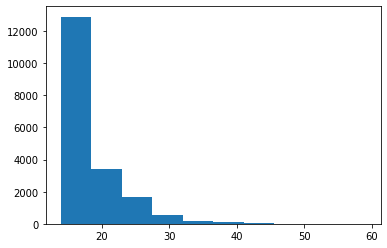

In [267]:
pd.crosstab(ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS'], ppp['PL190: WHEN BEGAN FIRST REGULAR JOB'].isna(),normalize='index').apply(lambda x: round(x,2))
## conclusion: nans in all pl031 categories, but 

### too many nones, probably highly correlated with "PB140: YEAR OF BIRTH",
ppp['PL190: WHEN BEGAN FIRST REGULAR JOB'].corr(ppp['PB140: YEAR OF BIRTH']) # not at all

plt.hist(ppp['PL190: WHEN BEGAN FIRST REGULAR JOB'], bins=10)

In [268]:
pd.crosstab( ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS'],ppp['PL190: WHEN BEGAN FIRST REGULAR JOB'].isna(),normalize='index').apply(lambda x: round(x,2))

# conclusion: most nans are also with unemployed (5) antd the others, but here i think it doesnt make sense to fill any value
# because we dont know if they had a ob befor beeing unemployed or in a training... 
# also most values are around 20, not big variation 
# drop column 
ppp['PL190: WHEN BEGAN FIRST REGULAR JOB'].mean()
ppp['PL190: WHEN BEGAN FIRST REGULAR JOB'].median()
ppp['PL190: WHEN BEGAN FIRST REGULAR JOB'][ppp['PL190: WHEN BEGAN FIRST REGULAR JOB']>24].count()/ ppp['PL190: WHEN BEGAN FIRST REGULAR JOB'].count()

0.1016634880271244

In [269]:
# because still a lot of nans i drop the column. it is not one of the most important 
## because the information is similar to self-defined current economic status ill drop the column

work.remove('PL190: WHEN BEGAN FIRST REGULAR JOB')

In [270]:
ppp.drop('PL190: WHEN BEGAN FIRST REGULAR JOB', axis =1, inplace=True)

###### Conlusion -  work

In [271]:
ppp[work].isna().sum()
### still a lot of nans...

PL031: SELF-DEFINED CURRENT ECONOMIC STATUS               0
PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK    0
PL051: OCCUPATION (ISCO-08 (COM))                         0
dtype: int64

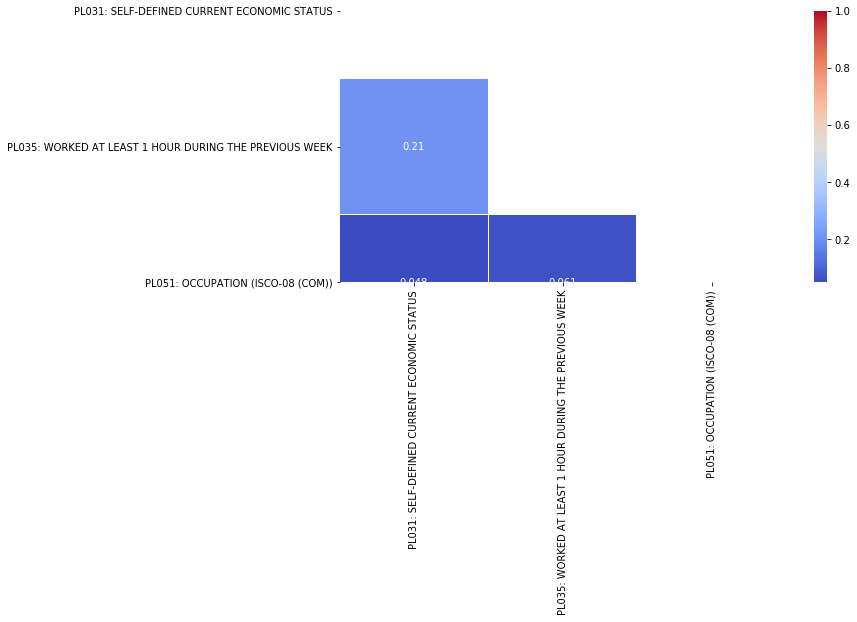

In [272]:
#### check colinearity (drop columns?)

subwork =ppp[work]

plt.figure(figsize =(10,5))
corr = subwork.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, cmap='coolwarm', annot = True, linewidth=0.5, mask=mask)
## almost no correlation

In [273]:
corr

,PL031: SELF-DEFINED CURRENT ECONOMIC STATUS,PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK,PL051: OCCUPATION (ISCO-08 (COM))
PL031: SELF-DEFINED CURRENT ECONOMIC STATUS,1.000000,0.208598,0.048197
PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK,0.208598,1.000000,0.060844
PL051: OCCUPATION (ISCO-08 (COM)),0.048197,0.060844,1.000000


In [274]:
# no more col to drop

for x in  work:
    cols.append(x)
print(cols)


['PB140: YEAR OF BIRTH', 'PB150: SEX', 'PB190: MARITAL STATUS', 'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP', 'PE010: CURRENT EDUCATION ACTIVITY', 'PE040: HIGHEST ISCED LEVEL ATTAINED', 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS', 'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK', 'PL051: OCCUPATION (ISCO-08 (COM))']


## 2.4 Health (PH) - Columns

In [275]:
health

['PH010: GENERAL HEALTH',
 'PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION',
 'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
 'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
 'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT']

In [276]:
ppp[health].isna().sum()
## overall not a lot of missings (especially compared to PL) --> try to keep all the features

PH010: GENERAL HEALTH                                                     28
PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION     44
PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS               191
PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT                     0
PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT                      0
dtype: int64

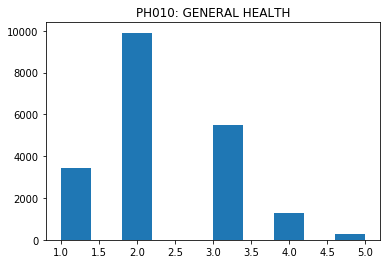

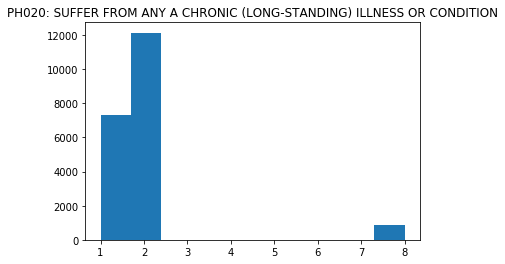

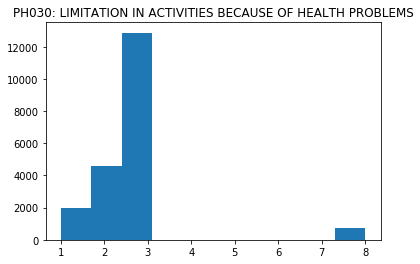

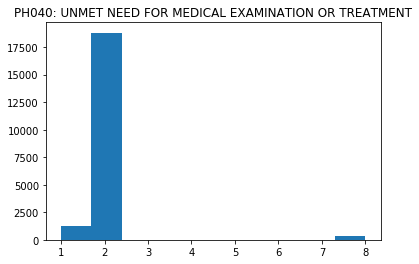

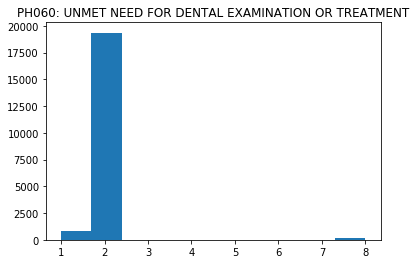

In [277]:
for x in range(len(health)):
    plt.hist(ppp[health[x]])
    plt.title(health[x])
    plt.show()

In [278]:
### strange value 8 for PH20-PH60 --> check documentation
# documentation 8= dont know, 9 = refusal
# to be consistent with the other features "dont know"  to -1
#count dont'know

for x in range(len(health)): 
    print(health[x], ppp.loc[(ppp[health[x]]==8), health[x]].shape)

PH010: GENERAL HEALTH (0,)
PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION (843,)
PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS (750,)
PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT (321,)
PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT (214,)


In [279]:
## too many dont konow int pH020 and PH030 , also in combination with nan --> drop column
health.remove('PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION')
health.remove('PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS')

In [280]:
ppp.drop(['PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION','PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS'], axis =1, inplace=True)

###### [0] PH010: GENERAL HEALTH 

(array([3411.,    0., 9905.,    0.,    0., 5469.,    0., 1279.,    0.,
         268.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

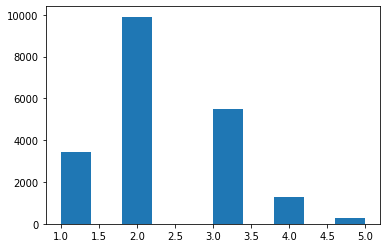

In [281]:
"""
The measurement of self-perceived health (SPH) is, by its very nature, subjective. The notion 
is restricted to an assessment coming from the individual and not from anyone outside that 
individual.
1 very good 
2 good 
3 fair 
4 bad 
5 very bad 

"""

ppp[health[0]].unique() ### values match definition

## drop the nans
ppp.dropna(subset=[health[0]], inplace = True)
ppp[health[0]].isna().sum()

plt.hist(ppp[health[0]]) ## slightly left shifted distribution, but i dont see a problem with that at the momemnt

###### [1] PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT 

In [282]:
health[1]

'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT'

In [283]:
"""
1 yes, there was at least one occasion when the person really needed examination 
or treatment but did not 
2 no, there was no occasion when the person really needed examination or 
treatment but did not 
"""
ppp[health[1]].value_counts()
## also has -1...
# 355 --> do the same as with the other healths
# probably problem of imbalanced answers!!


2    18777
1     1234
8      321
Name: PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT, dtype: int64

###### [2] PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT 

In [284]:
"""
1 yes, there was at least one occasion when the person really needed dental 
examination or treatment but did not 
2 no, there was no occasion when the person really needed dental examination or 
treatment but did not 
"""
ppp[health[2]].value_counts()
## also has -1...
# 236 --> do the same as with the other healths
# even more likely a problem of imbalancing!!
# no nans

2    19338
1      780
8      214
Name: PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT, dtype: int64

###### Conclusion

In [285]:
ppp[health].isna().sum()

PH010: GENERAL HEALTH                                     0
PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT    0
PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT     0
dtype: int64

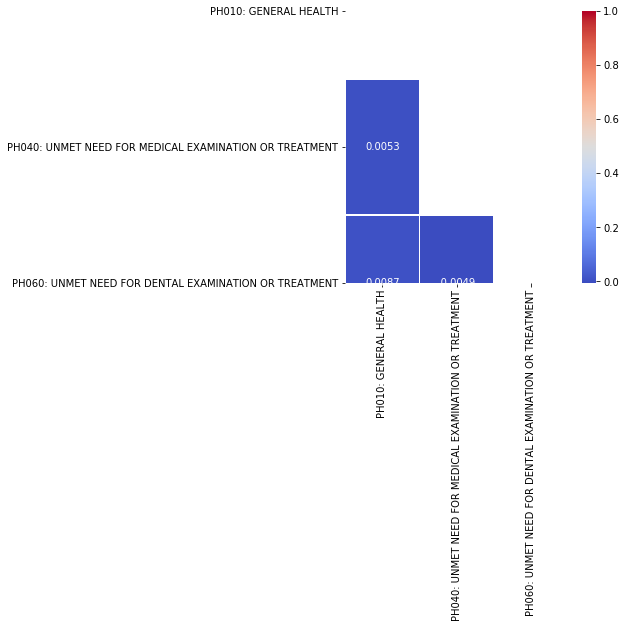

In [286]:
subhealth =ppp[health]

plt.figure(figsize =(5,5))
corr = subhealth.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, cmap='coolwarm', annot = True, linewidth=0.5, mask=mask)
## alsmost no correlation

In [287]:
for x in  health:
    cols.append(x)
print(cols)

health

['PB140: YEAR OF BIRTH', 'PB150: SEX', 'PB190: MARITAL STATUS', 'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP', 'PE010: CURRENT EDUCATION ACTIVITY', 'PE040: HIGHEST ISCED LEVEL ATTAINED', 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS', 'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK', 'PL051: OCCUPATION (ISCO-08 (COM))', 'PH010: GENERAL HEALTH', 'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT', 'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT']


['PH010: GENERAL HEALTH',
 'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
 'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT']

## 2.5 Job Stuff (PY) - Columns

In [288]:
### job stuff
job = ['PY010G: EMPLOYEE CASH OR NEAR CASH INCOME',
       'PY020G: NON-CASH EMPLOYEE INCOME', 'PY021G: COMPANY CAR',
       'PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS',
       'PY050G: CASH BENEFITS OR LOSSES FROM SELF-EMPLOYMENT',
       'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
       'PY090G: UNEMPLOYMENT BENEFITS', 'PY100G: OLD-AGE BENEFITS',
       'PY110G: SURVIVOR’ BENEFITS', 'PY120G: SICKNESS BENEFITS',
       'PY130G: DISABILITY BENEFITS', 'PY140G: EDUCATION-RELATED ALLOWANCES']
ppp[job].isna().sum()
## no nan - jeah!!

### but i only keep the "important ones"

job = ['PY010G: EMPLOYEE CASH OR NEAR CASH INCOME',
       'PY050G: CASH BENEFITS OR LOSSES FROM SELF-EMPLOYMENT',
       'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
       'PY090G: UNEMPLOYMENT BENEFITS', 'PY100G: OLD-AGE BENEFITS',
       'PY110G: SURVIVOR’ BENEFITS', 'PY120G: SICKNESS BENEFITS',
       'PY130G: DISABILITY BENEFITS', 'PY140G: EDUCATION-RELATED ALLOWANCES']

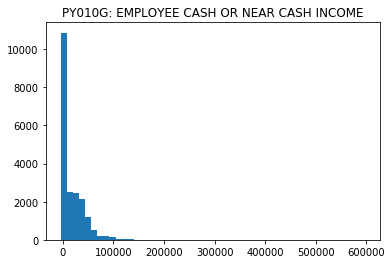

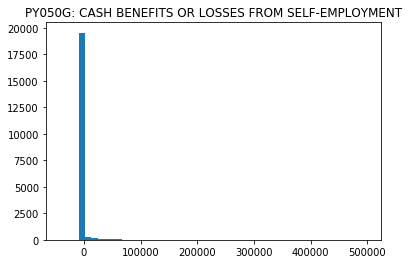

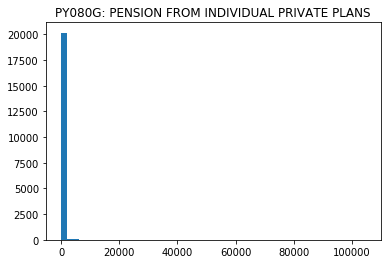

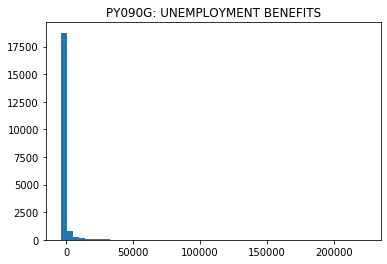

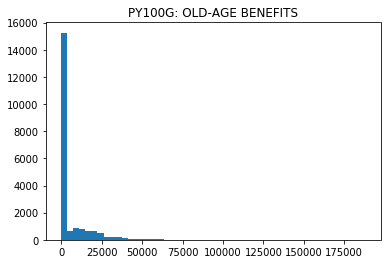

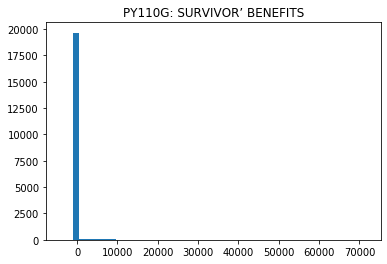

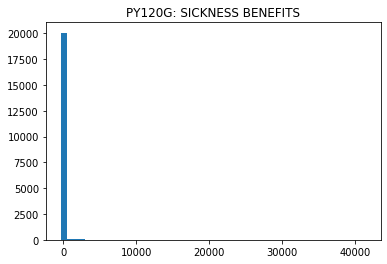

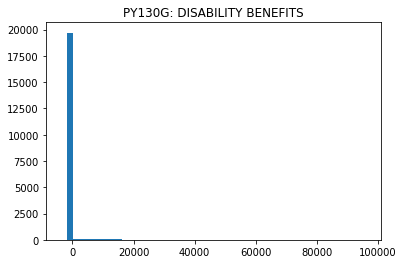

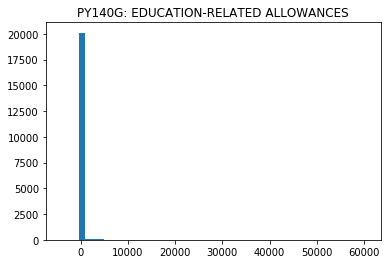

In [289]:
for x in range(len(job)):
    plt.hist(ppp[job[x]], bins = 50)
    plt.title(job[x])
    plt.show()
# conclusion: 0 for no, than the number  --> check if it could be a good  idea to change it to a boolean

In [290]:
ppp[job].describe()

,PY010G: EMPLOYEE CASH OR NEAR CASH INCOME,PY050G: CASH BENEFITS OR LOSSES FROM SELF-EMPLOYMENT,PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS,PY090G: UNEMPLOYMENT BENEFITS,PY100G: OLD-AGE BENEFITS,PY110G: SURVIVOR’ BENEFITS,PY120G: SICKNESS BENEFITS,PY130G: DISABILITY BENEFITS,PY140G: EDUCATION-RELATED ALLOWANCES
count,20332.000000,20332.000000,20332.000000,20332.000000,20332.000000,20332.000000,20332.000000,20332.000000,20332.000000
mean,17103.932218,1402.987395,91.096092,739.117376,4867.791837,292.726747,80.844502,352.266720,100.127455
std,24778.251690,10886.533994,1514.326958,4548.794123,11080.086392,2239.649851,1077.376239,2669.616459,1344.713232
min,-3662.860000,-40127.630000,0.000000,-3932.450000,-309.730000,-3981.770000,-292.460000,-3719.140000,-4140.010000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5651.825000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29598.620000,0.000000,0.000000,0.000000,3420.645000,0.000000,0.000000,0.000000,0.000000
max,597559.990000,496542.820000,104613.480000,223825.010000,188119.910000,71480.460000,41425.710000,95899.040000,60284.900000


In [291]:
"""
Comment:
- strange negative values
- imbalanced datas (since 75%-quartile is often 0)

ideas: 
- check if it could be a good idea to generate an income column
- check if it could be a good idea to generate 1 column for "benefits" --> yes


"""

'\nComment:\n- strange negative values\n- imbalanced datas (since 75%-quartile is often 0)\n\nideas: \n- check if it could be a good idea to generate an income column\n- check if it could be a good idea to generate 1 column for "benefits" --> yes\n\n\n'

###### [0] PY010G: EMPLOYEE CASH OR NEAR CASH INCOME'

In [292]:
"""
INCOME (Gross personal income, total and components at personal level)
Gross means that neither taxes nor social contributions have been deducted at source. 
0 no income
1 - 999999.99 income (national currency)  (Euro)

The employee income is broken down into: 
(1) Gross employee cash or near cash income (PY010G) : It refers to the monetary component of the compensation of employees in cash payable by an 
employer to an employee.
(2) Gross non-cash employee income (PY020G) It refers to the non-monetary income components which may be provided free or at reduced 
price to an employee as part of the employment package by an employer
(3) Employers’ social insurance contributions (PY030G) 
"""
## this is a very important feature

## check negatives
ppp[ppp[job[0]]<0].shape[0] ## --> 12 negative values; drop
ppp= ppp[ppp[job[0]]>=0]
ppp.shape[0]

20321

74021.5
43


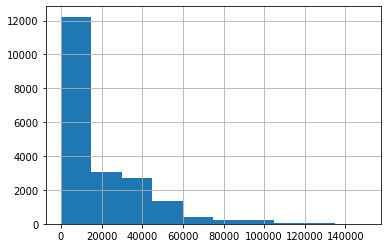

In [293]:
## check outliers
Q1 = ppp[job[0]].quantile(0.25)
Q3 = ppp[job[0]].quantile(0.75)
IQR = Q3 - Q1

print((Q3 + 1.5 * IQR))
#outlier = ppp[~(ppp[job[0]]> (Q3 + 1.5 * IQR))]
# ppp.shape[0]-outlier.shape[0]  --> too many outliers like that, and also, the limit of 70'000 Euros for declaring saleries as outliers is too small

### set limit for outliers at 150'000 Euro (based on my knowledge)
outlier = ppp[~(ppp[job[0]]> (150000))]
print(ppp.shape[0]-outlier.shape[0])

outlier[job[0]].hist()
ppp = outlier

In [294]:
"""
Contributions made, during the income reference period, to individual private pension plans 
refers to the pensions policies taken out by individual households on their own initiative and 
for their own benefit, independently of their employers or government and outside any social 
insurance scheme. 
1 - 999999.99 amount (national currency) 
0 no contribution 
"""

ppp[ppp[job[3]]==0].shape[0]/ppp.shape[0]

# remark: regarding the content, i think this is not a very important variable. However, no misssings, no imbalancing --> keep it s

0.9145379228720781

###### [1]  'PY050G: CASH BENEFITS OR LOSSES FROM SELF-EMPLOYMENT'

In [295]:
job[1]

'PY050G: CASH BENEFITS OR LOSSES FROM SELF-EMPLOYMENT'

In [296]:
"""
Self-employment income is defined as the income received, during the income reference 
period, by individuals, for themselves or in respect of their family members, as a result of 
their current or former involvement in self-employment jobs. 

1 - 999999.99 benefits 
-999999.99 - -1 losses 
0 no income
"""
## i add this to the previous feature income, because it doesnt matter if the income is from self- employed or job; this divergence i
ppp[job[0]] =ppp[job[0]] +ppp[job[1]]
ppp.drop(job[1], axis=1, inplace = True)



In [297]:
job

['PY010G: EMPLOYEE CASH OR NEAR CASH INCOME',
 'PY050G: CASH BENEFITS OR LOSSES FROM SELF-EMPLOYMENT',
 'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
 'PY090G: UNEMPLOYMENT BENEFITS',
 'PY100G: OLD-AGE BENEFITS',
 'PY110G: SURVIVOR’ BENEFITS',
 'PY120G: SICKNESS BENEFITS',
 'PY130G: DISABILITY BENEFITS',
 'PY140G: EDUCATION-RELATED ALLOWANCES']

In [298]:
ppp=ppp.rename(columns={'PY010G: EMPLOYEE CASH OR NEAR CASH INCOME':'PY010G: INCOME'})
job= ['PY010G: INCOME',
 'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
 'PY090G: UNEMPLOYMENT BENEFITS',
 'PY100G: OLD-AGE BENEFITS',
 'PY110G: SURVIVOR’ BENEFITS',
 'PY120G: SICKNESS BENEFITS',
 'PY130G: DISABILITY BENEFITS',
 'PY140G: EDUCATION-RELATED ALLOWANCES']

###### [1]  ''PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS'

In [299]:
job[0]

'PY010G: INCOME'

PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS


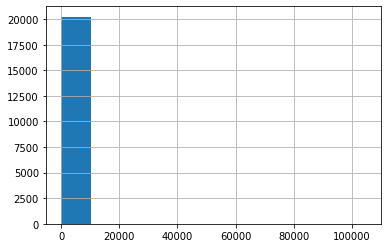

In [300]:
""" 
[1]  ''PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS'
Regular pensions from private plans (other than those covered under ESSPROS) refer to 
pensions and annuities received, during the income reference period, in the form of interest or 
dividend income from individual private insurance plans, i.e. fully organised schemes where 
contributions are at the discretion of the contributor independently of their employers or 
government.
"""
print(job[1])
ppp[job[1]].hist()

## adden to income
ppp[job[0]] =ppp[job[0]] +ppp[job[1]]
ppp.drop(job[1], axis=1, inplace = True)

In [301]:
job.remove('PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS')

77278.9375
20


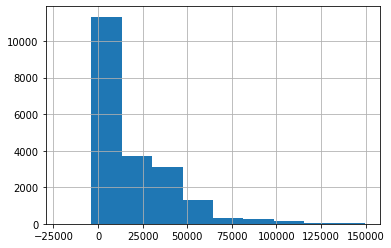

In [302]:
## check outliers
Q1 = ppp[job[0]].quantile(0.25)
Q3 = ppp[job[0]].quantile(0.75)
IQR = Q3 - Q1

print((Q3 + 1.5 * IQR))
#outlier = ppp[~(ppp[job[0]]> (Q3 + 1.5 * IQR))]
# ppp.shape[0]-outlier.shape[0]  --> too many outliers like that, and also, the limit of 70'000 Euros for declaring saleries as outliers is too small

### set limit for outliers at 150'000 Euro (based on my knowledge)
outlier = ppp[~(ppp[job[0]]> (150000))]
print(ppp.shape[0]-outlier.shape[0])

outlier[job[0]].hist()
ppp = outlier

In [303]:
###### [6:10] 'Social benefits in euro'
"""
Social benefits1 are defined as current transfers received during the income reference period2 
by households intended to relieve them from the financial burden of a number of risk or 
needs, made through collectively organised schemes, or outside such schemes by government 
units and NPISHs.
"""
 

'\nSocial benefits1 are defined as current transfers received during the income reference period2 \nby households intended to relieve them from the financial burden of a number of risk or \nneeds, made through collectively organised schemes, or outside such schemes by government \nunits and NPISHs.\n'

In [304]:
ppp[job[2:6]].describe()
# negative values outliers?

,PY100G: OLD-AGE BENEFITS,PY110G: SURVIVOR’ BENEFITS,PY120G: SICKNESS BENEFITS,PY130G: DISABILITY BENEFITS
count,20258.000000,20258.000000,20258.000000,20258.000000
mean,4885.588575,293.796042,81.154254,353.891944
std,11096.385143,2243.666896,1079.328162,2674.180255
min,0.000000,-3981.770000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,3545.937500,0.000000,0.000000,0.000000
max,188119.910000,71480.460000,41425.710000,95899.040000


In [305]:
for x in range(2,6):
    print(job[x], ppp[ppp[job[x]]<0].shape[0])
#only a few negative values ---> keep only 0 and higher
for x in range(2,6):
    ppp= ppp[ppp[job[x]]>=0]
    print(ppp.shape[0])

PY100G: OLD-AGE BENEFITS 0
PY110G: SURVIVOR’ BENEFITS 1
PY120G: SICKNESS BENEFITS 0
PY130G: DISABILITY BENEFITS 0
20258
20257
20257
20257


In [306]:
ppp["PY090G++: SOCIAL BENEFITS"] = ppp[job[2]]+ppp[job[3]]+ppp[job[4]]+ppp[job[5]]+ppp[job[6]]

In [307]:
for x in range(2,6):
    ppp.drop(job[x], axis=1, inplace=True)

### conclusion

In [308]:
job

['PY010G: INCOME',
 'PY090G: UNEMPLOYMENT BENEFITS',
 'PY100G: OLD-AGE BENEFITS',
 'PY110G: SURVIVOR’ BENEFITS',
 'PY120G: SICKNESS BENEFITS',
 'PY130G: DISABILITY BENEFITS',
 'PY140G: EDUCATION-RELATED ALLOWANCES']

In [309]:
job= ['PY010G: INCOME', "PY090G++: SOCIAL BENEFITS"]

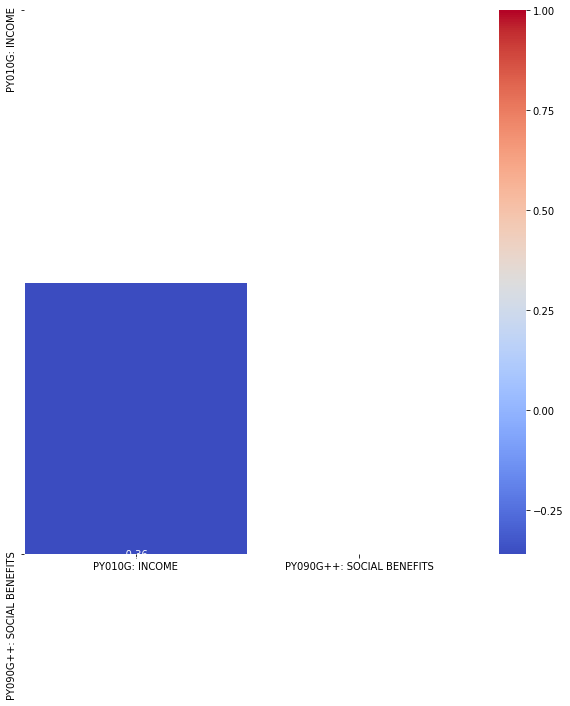

In [310]:
subjob =ppp[job]

plt.figure(figsize =(10,10))
corr = subjob.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, cmap='coolwarm', annot = True, linewidth=0.5, mask=mask)

### correlated

In [311]:
for x in  job:
    cols.append(x)
print(cols)

['PB140: YEAR OF BIRTH', 'PB150: SEX', 'PB190: MARITAL STATUS', 'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP', 'PE010: CURRENT EDUCATION ACTIVITY', 'PE040: HIGHEST ISCED LEVEL ATTAINED', 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS', 'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK', 'PL051: OCCUPATION (ISCO-08 (COM))', 'PH010: GENERAL HEALTH', 'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT', 'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT', 'PY010G: INCOME', 'PY090G++: SOCIAL BENEFITS']


## 2.7 Basic Needs  (PD) - columns

In [312]:
"""
Basic Needs
1 Yes  
2 No - cannot afford it  
3 No - other reason  
"""

'\nBasic Needs\n1 Yes  \n2 No - cannot afford it  \n3 No - other reason  \n'

In [313]:
## Basic Needs  
bneeds= ['PD020: Replace worn-out clothes by some new (not second-hand) ones',
       'PD030: Two pairs of properly fitting shoes',
       'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
       'PD060: Regularly participate in a leisure activity',
       'PD070: Spend a small amount of money each week on yourself',
       'PD080: Internet connection for personal use at home']
ppp[bneeds].isna().sum()

PD020: Replace worn-out clothes by some new (not second-hand) ones                            176
PD030: Two pairs of properly fitting shoes                                                    167
PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month    186
PD060: Regularly participate in a leisure activity                                            143
PD070: Spend a small amount of money each week on yourself                                    193
PD080: Internet connection for personal use at home                                           182
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029E40C30288>,
      dtype=object)

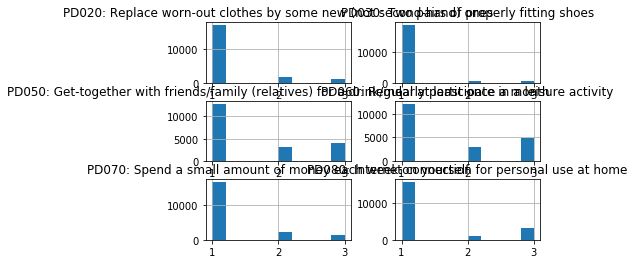

In [314]:
ppp[bneeds].hist()

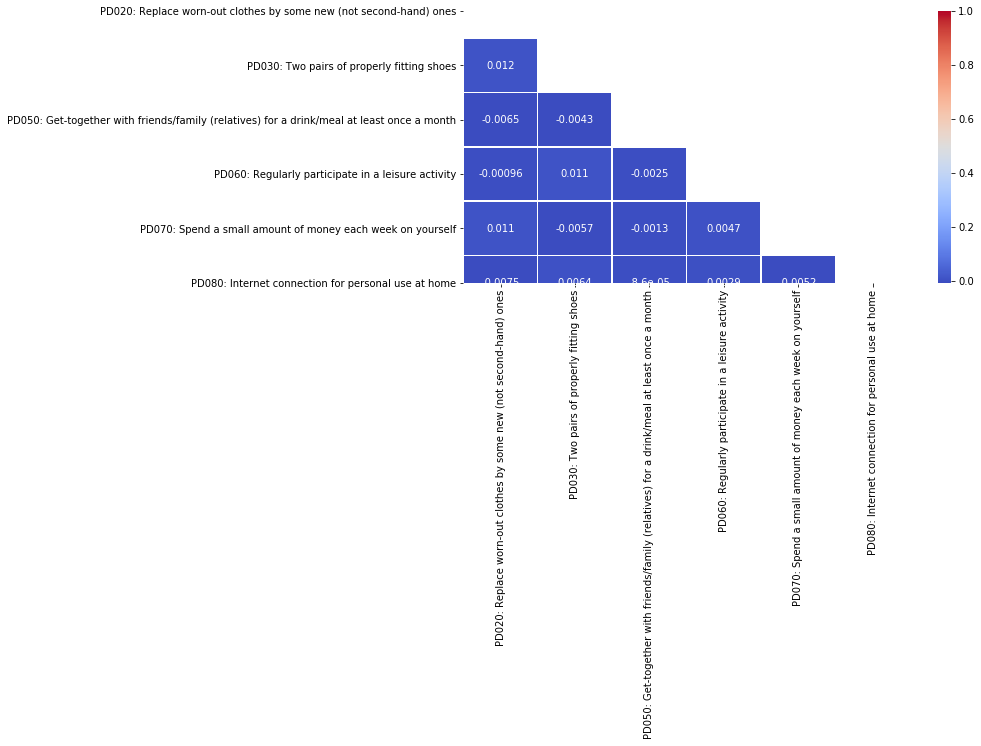

In [315]:
subbneeds =ppp[bneeds]

plt.figure(figsize =(10,5))
corr = subbneeds.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, cmap='coolwarm', annot = True, linewidth=0.5, mask=mask)


## no high correlations

In [316]:
for x in range(0, len(bneeds)): 
    null_displ = ppp[ppp[bneeds[x]].isna()==False]
    print(null_displ[bneeds].isna().sum())
## --> different nan, so deleting nan is not a good idea

# either i fill na or i drop columns

PD020: Replace worn-out clothes by some new (not second-hand) ones                              0
PD030: Two pairs of properly fitting shoes                                                    166
PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month    185
PD060: Regularly participate in a leisure activity                                            142
PD070: Spend a small amount of money each week on yourself                                    193
PD080: Internet connection for personal use at home                                           182
dtype: int64
PD020: Replace worn-out clothes by some new (not second-hand) ones                            175
PD030: Two pairs of properly fitting shoes                                                      0
PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month    186
PD060: Regularly participate in a leisure activity                                            141
PD070: 

In [317]:
bneeds

['PD020: Replace worn-out clothes by some new (not second-hand) ones',
 'PD030: Two pairs of properly fitting shoes',
 'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
 'PD060: Regularly participate in a leisure activity',
 'PD070: Spend a small amount of money each week on yourself',
 'PD080: Internet connection for personal use at home']

In [318]:
### i choose some features and drop nan:
droppe=['PD020: Replace worn-out clothes by some new (not second-hand) ones', 
        'PD030: Two pairs of properly fitting shoes','PD070: Spend a small amount of money each week on yourself']

bneeds= ['PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
       'PD060: Regularly participate in a leisure activity',
       'PD080: Internet connection for personal use at home']

In [319]:
ppp.drop(droppe, axis=1, inplace=True)

In [320]:
ppp.dropna(subset=bneeds, inplace = True)

In [321]:
for x in bneeds:
    cols.append(x)
print(cols)

['PB140: YEAR OF BIRTH', 'PB150: SEX', 'PB190: MARITAL STATUS', 'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP', 'PE010: CURRENT EDUCATION ACTIVITY', 'PE040: HIGHEST ISCED LEVEL ATTAINED', 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS', 'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK', 'PL051: OCCUPATION (ISCO-08 (COM))', 'PH010: GENERAL HEALTH', 'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT', 'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT', 'PY010G: INCOME', 'PY090G++: SOCIAL BENEFITS', 'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month', 'PD060: Regularly participate in a leisure activity', 'PD080: Internet connection for personal use at home']


In [322]:
len(cols)

18

## 2.6 Satisfaction (PW) - Columns

In [323]:
### satisification 
sat =['PW010: OVERALL LIFE SATISFACTION', 'PW020: MEANING OF LIFE',
       'PW030: SATISFACTION WITH FINANCIAL SITUATION',
       'PW040: SATISFACTION WITH ACCOMMODATION', 'PW050: BEING VERY NERVOUS',
       'PW060: FEELING DOWN IN THE DUMPS', 'PW070: FEELING CALM AND PEACEFUL',
       'PW080: FEELING DOWNHEARTED OR DEPRESSED', 'PW090: BEING HAPPY',
       'PW120: SATISFACTION WITH TIME USE',
       'PW130: TRUST IN THE POLITICAL SYSTEM',
       'PW140: TRUST IN THE LEGAL SYSTEM', 'PW150: TRUST IN THE POLICE',
       'PW160: SATISFACTION WITH PERSONAL RELATIONSHIPS',
       'PW170: PERSONAL MATTERS (ANYONE TO DISCUSS WITH)',
       'PW180: HELP FROM OTHERS', 'PW190: TRUST IN OTHERS',
       'PW200: SATISFACTION WITH RECREATIONAL OR GREEN AREAS',
       'PW210: SATISFACTION WITH LIVING ENVIRONMENT',
       'PW220: PHYSICAL SECURITY']

ppp[sat].isna().sum()

PW010: OVERALL LIFE SATISFACTION                        3110
PW020: MEANING OF LIFE                                  3166
PW030: SATISFACTION WITH FINANCIAL SITUATION            3145
PW040: SATISFACTION WITH ACCOMMODATION                  3047
PW050: BEING VERY NERVOUS                               3163
PW060: FEELING DOWN IN THE DUMPS                        3229
PW070: FEELING CALM AND PEACEFUL                        3172
PW080: FEELING DOWNHEARTED OR DEPRESSED                 3118
PW090: BEING HAPPY                                      3136
PW120: SATISFACTION WITH TIME USE                       3264
PW130: TRUST IN THE POLITICAL SYSTEM                    3072
PW140: TRUST IN THE LEGAL SYSTEM                        3074
PW150: TRUST IN THE POLICE                              3150
PW160: SATISFACTION WITH PERSONAL RELATIONSHIPS         3196
PW170: PERSONAL MATTERS (ANYONE TO DISCUSS WITH)        2987
PW180: HELP FROM OTHERS                                 3014
PW190: TRUST IN OTHERS  

In [324]:
### this variable i use for outcome variables 
## thats why i only focus on the one i am interested most

### for each of this variable i create a dataset and save it


###### [0] OVERALL LIFE SATISFACTION

In [325]:
"""
Life satisfaction represents a report of how a respondent evaluates or appraises his or her life 
taken as a whole. It is intended to represent a broad, reflective appraisal the person makes of 
his or her life. The term life is intended here as all areas of a person’s life at a particular point 
in time (these days)1.
0-10 From 0 (Not at all satisfied) to 10 (Completely satisfied) 
99 Do not know

"""

ppp[sat[0]].describe()
ppp[sat[0]].value_counts()

8.0     5211
7.0     2777
9.0     2462
5.0     1713
10.0    1569
6.0     1275
4.0      471
3.0      453
99.0     249
2.0      228
0.0      132
1.0       97
Name: PW010: OVERALL LIFE SATISFACTION, dtype: int64

In [326]:
outcome = [sat[0]]

###### [10] 'TRUST IN THE POLITICAL SYSTEM'

In [327]:
sat[10]

'PW130: TRUST IN THE POLITICAL SYSTEM'

In [328]:
"""
The term 'political system' refers to a complete set of institutions, interest groups (such as 
political parties, trade unions), the relationships between those institutions and the political 
norms and rules that govern their functions. 

0-10 From 0 (No trust at all) to 10 (Complete trust) 
99 Do not know
"""

ppp[sat[10]].describe()
ppp[sat[10]].value_counts()

5.0     2867
8.0     2003
7.0     1977
6.0     1759
3.0     1623
2.0     1430
4.0     1295
0.0     1096
1.0      826
9.0      729
99.0     712
10.0     358
Name: PW130: TRUST IN THE POLITICAL SYSTEM, dtype: int64

In [329]:
outcome.append(sat[10])

### create 2 cleaned dataset

In [330]:
outcome


['PW010: OVERALL LIFE SATISFACTION', 'PW130: TRUST IN THE POLITICAL SYSTEM']

In [331]:
col0 =cols
col0.append(outcome[0])

### drop na and dont knows
life=ppp[col0].dropna()
life=life[life[outcome[0]]!=99]
life.isna().sum().max()

0

In [332]:
print("life ", life.shape)
life.to_csv('./data/life_satisfaction_cleaned.csv')

life  (16388, 19)


In [333]:
col1 =cols
col1.append(outcome[1])

### drop na and dont knows
politic=ppp[col1].dropna()
politic=politic[politic[outcome[0]]!=99]
politic.isna().sum().max()

0

In [334]:
print("politic ", politic.shape)
politic.to_csv('./data/politic_satisfaction_cleaned.csv')

politic  (13844, 20)


####  create dataset with all sat

In [335]:
colall =cols
for x in sat: 
    colall.append(x)
datamax=ppp[colall].dropna()

In [336]:
datamax.to_csv('./data/datamax_cleaned.csv')